In [1]:
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

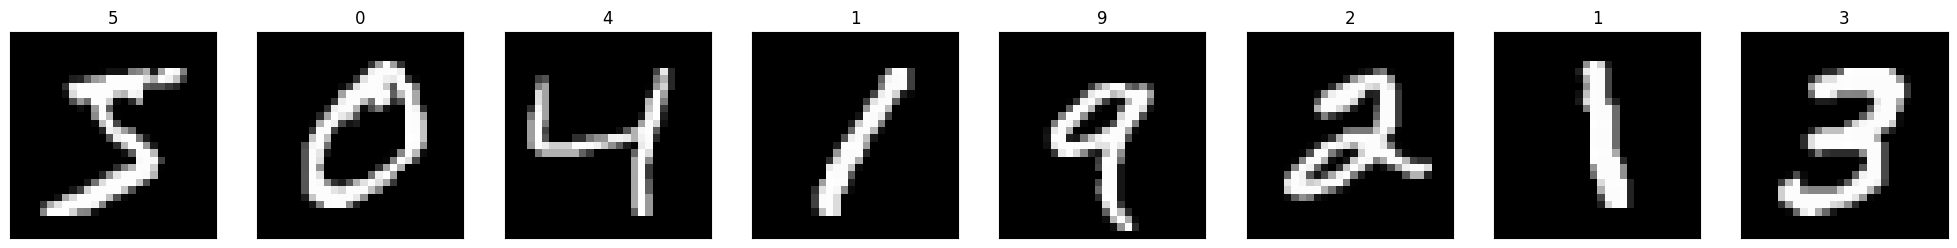

In [4]:
# show dataset
plt.figure(figsize=(25,4))
for i in range(8):
  plt.subplot(1,8,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(y_train[i])

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [6]:
# Convert class vectors to binary class matrices.
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes) # One-hot encode the labels
y_test = keras.utils.to_categorical(y_test, num_classes) # One-hot encode the labels

In [ ]:
x_train = x_train.astype(float) / 255. # Normalize inputs from [0, 255] to [0, 1] (converge faster)
x_test  = x_test.astype(float) / 255. # Normalize inputs from [0, 255] to [0, 1] (converge faster)

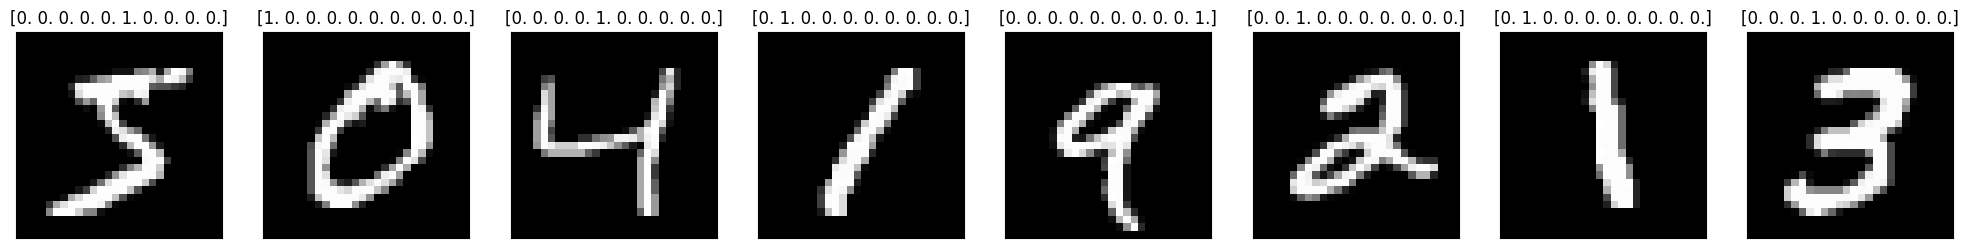

In [7]:
# show dataset
plt.figure(figsize=(25,4))
for i in range(8):
  plt.subplot(1,8,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(str(y_train[i]))

In [10]:
# define model
model = keras.Sequential(name="mnist_mlp")
model.add(keras.layers.Input(shape=x_train[0].shape, name="input_layer")) # (28, 28)
model.add(keras.layers.Flatten(name="flatten_layer")) # (28, 28) -> (28*28,) = (784, )
model.add(keras.layers.Dense(units=512, activation='relu', name="layer_1"))
model.add(keras.layers.Dense(units=256, activation='relu', name="layer_2"))
model.add(keras.layers.Dense(units=num_classes, activation='softmax', name="layer_3")) # num_classes=10

model.summary()

Model: "mnist_mlp"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_layer (Flatten)     (None, 784)               0         
                                                                 
 layer_1 (Dense)             (None, 512)               401920    
                                                                 
 layer_2 (Dense)             (None, 256)               131328    
                                                                 
 layer_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
# train model
history = model.fit(x_train, y_train,
                    batch_size=100,
                    epochs=20,
                    validation_data=(x_test, y_test),
                    shuffle=True)

Epoch 1/20
600/600 [==============================] - 8s 4ms/step - loss: 2.2542 - accuracy: 0.9033 - val_loss: 0.4060 - val_accuracy: 0.9379
Epoch 2/20
600/600 [==============================] - 2s 4ms/step - loss: 0.2724 - accuracy: 0.9517 - val_loss: 0.3319 - val_accuracy: 0.9453
Epoch 3/20
600/600 [==============================] - 3s 5ms/step - loss: 0.1671 - accuracy: 0.9649 - val_loss: 0.2763 - val_accuracy: 0.9505
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1218 - accuracy: 0.9712 - val_loss: 0.2266 - val_accuracy: 0.9586
Epoch 5/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1029 - accuracy: 0.9746 - val_loss: 0.2042 - val_accuracy: 0.9614
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0971 - accuracy: 0.9756 - val_loss: 0.2109 - val_accuracy: 0.9560
Epoch 7/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0894 - accuracy: 0.9764 - val_loss: 0.1764 - val_accuracy: 0.9640
Epoch 

313/313 [==============================] - 1s 2ms/step
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[3.30e-26 2.04e-13 3.80e-16 1.03e-13 9.87e-15 3.89e-21 3.60e-25 1.00e+00 2.88e-16 9.91e-11]


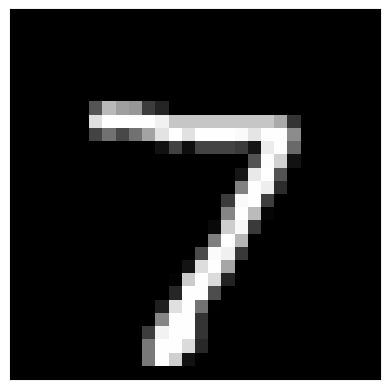

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[4.36e-17 7.83e-27 1.00e+00 1.56e-14 0.00e+00 1.42e-26 1.41e-22 8.57e-32 2.08e-31 0.00e+00]


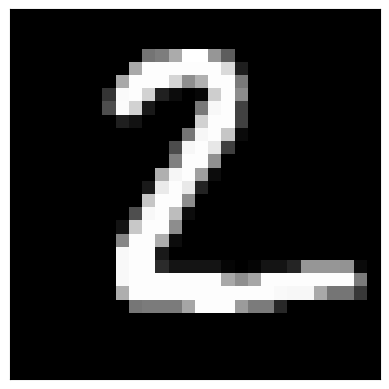

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.13e-22 1.00e+00 2.85e-15 3.30e-20 7.16e-19 2.24e-15 7.23e-22 1.47e-11 6.39e-16 3.30e-26]


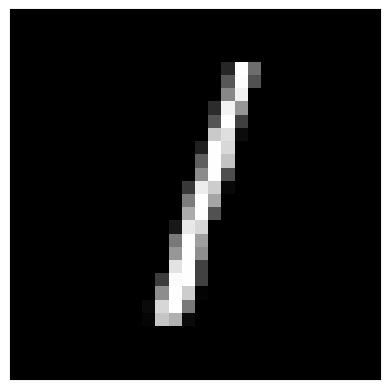

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.00e+00 3.68e-20 1.79e-10 2.60e-15 2.49e-17 2.97e-19 1.69e-08 7.93e-17 9.31e-12 9.98e-11]


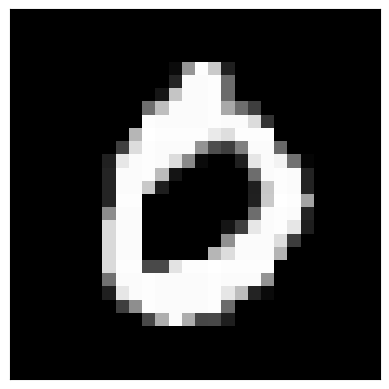

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[1.03e-21 1.67e-14 1.09e-16 7.81e-14 1.00e+00 2.32e-13 1.82e-20 2.39e-16 1.41e-13 1.87e-07]


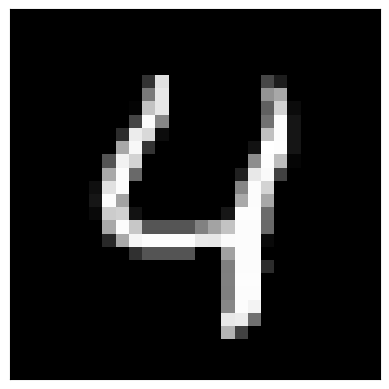

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[2.92e-23 1.00e+00 6.34e-17 1.00e-19 2.59e-17 3.30e-14 5.23e-23 2.14e-07 8.18e-15 8.24e-24]


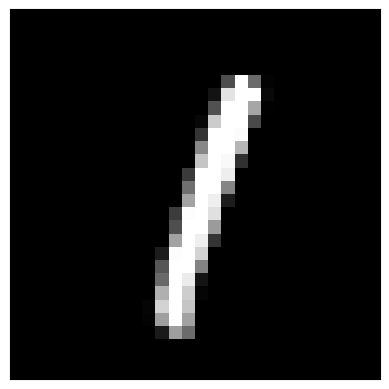

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[7.75e-22 1.62e-18 4.19e-15 2.86e-16 1.00e+00 2.34e-12 3.00e-23 6.08e-17 3.19e-09 1.71e-09]


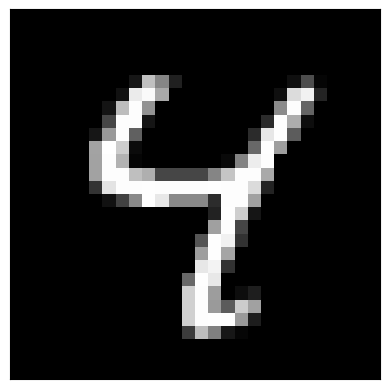

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1.30e-24 3.09e-32 2.87e-27 1.68e-16 1.83e-21 6.83e-23 3.86e-34 4.64e-20 5.73e-22 1.00e+00]


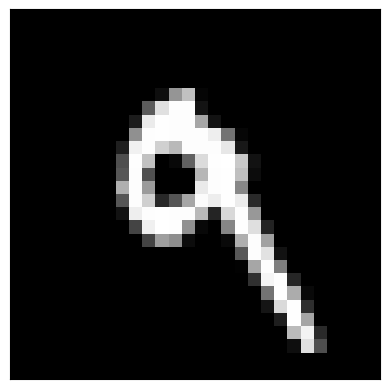

In [13]:
# show results
y_pred = model.predict(x_test)
np.set_printoptions(precision=2, linewidth=200)
for i in range(8):
    print(y_test[i])
    print(y_pred[i])
    plt.figure()
    plt.imshow(x_test[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.show()

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0.00e+00 1.40e-34 1.00e+00 5.51e-11 0.00e+00 8.89e-29 0.00e+00 2.11e-18 1.83e-06 0.00e+00]


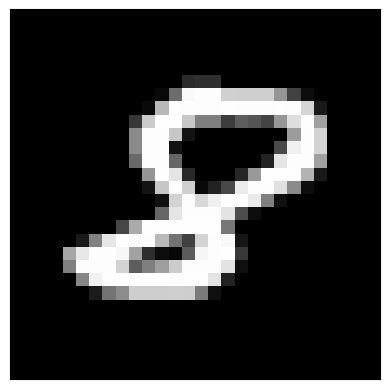

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0.00e+00 0.00e+00 3.08e-38 6.62e-26 8.84e-37 1.00e+00 4.30e-23 3.56e-33 7.53e-19 1.61e-09]


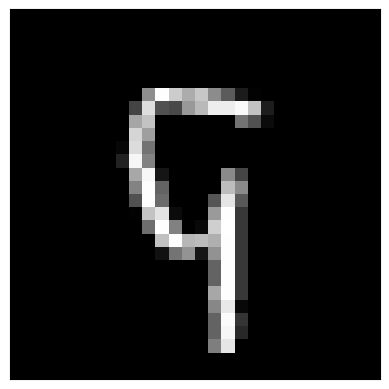

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[5.89e-38 1.24e-32 0.00e+00 1.79e-29 9.46e-01 9.59e-31 2.56e-35 3.72e-05 1.46e-20 5.44e-02]


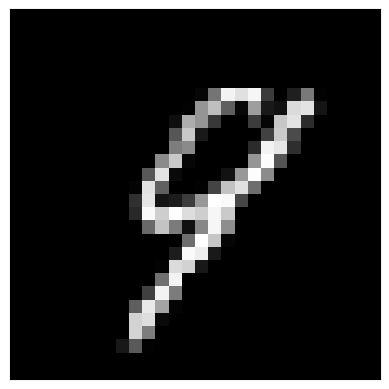

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[2.48e-24 4.16e-19 4.01e-14 1.89e-14 1.12e-06 4.12e-11 1.81e-14 1.03e-07 1.59e-15 1.00e+00]


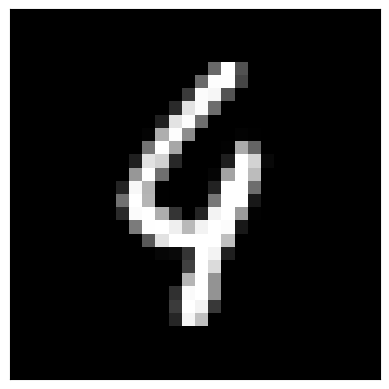

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[7.30e-14 7.65e-30 1.04e-03 2.32e-01 7.58e-36 3.64e-07 1.74e-16 2.25e-20 7.67e-01 2.81e-04]


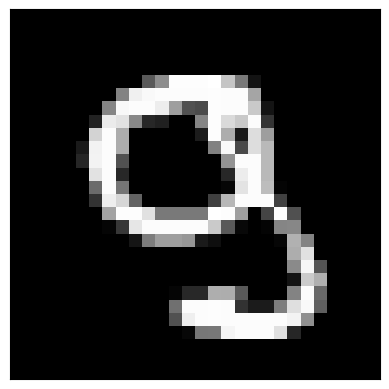

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1.13e-29 1.19e-19 9.25e-12 4.66e-04 7.35e-12 1.33e-08 5.84e-23 5.17e-09 9.99e-01 7.77e-04]


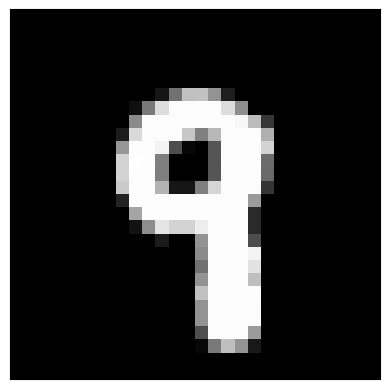

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0.00e+00 0.00e+00 0.00e+00 8.25e-28 0.00e+00 5.61e-02 0.00e+00 9.44e-01 2.28e-26 0.00e+00]


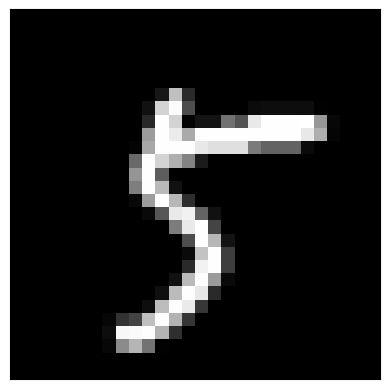

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0.00e+00 0.00e+00 1.80e-01 3.02e-37 1.94e-36 1.66e-30 8.20e-01 0.00e+00 4.29e-36 0.00e+00]


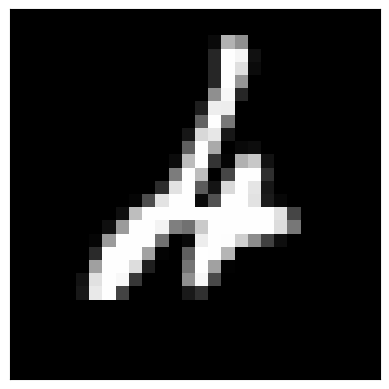

In [ ]:
y_p = np.argmax(y_pred, axis=1)
y_t = np.argmax(y_test, axis=1)
arg = np.where(y_p != y_t)[0]

# show results
for k in range(8):
    i = arg[k]
    print(y_test[i])
    print(y_pred[i])
    plt.figure()
    plt.imshow(x_test[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.show()

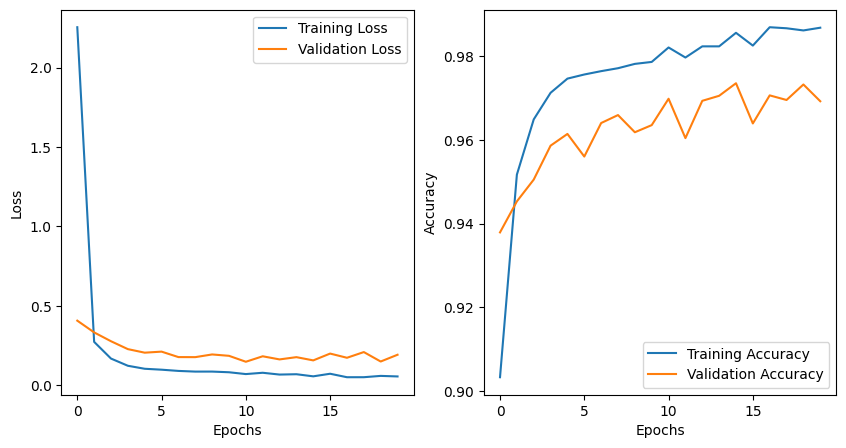

In [14]:
# Plot the Loss and Accuracy curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()